# MoDISco Hits Breakdown Plot

For each cell state, show bar plot of proportions of top motifs as per counts of MoDISco seqlets.

Based on `MoDISco_Breakdown_Plot.ipynb` and `MoDISco_Re_Breakdown_Plot.ipynb` but instead uses importance thresholded hits. 

Input:
1. Cluster config
2. One file per cell state with hits called.
3. Motif list with metadata
4. List of modisco motifs with annotation to filter (as the hits are called using all 30 motifs).

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Load Inputs

In [2]:
NUM_CLUST = 15

### Configs

In [3]:
cluster_config = read.table("../../figures_factory/configs/cluster.tsv", comment.char = '', header=T, sep='\t')
cluster_config$colour = as.character(cluster_config$colour)
cluster_config$description = as.character(cluster_config$description)

rownames(cluster_config) = cluster_config$cluster
cluster_config

,cluster,colour,description,new_cluster
,<int>,<chr>,<chr>,<int>
1,1,#B03743,Fibroblast,1
2,2,#E85F6D,Fibroblast-like,3
3,3,#7C2730,Fibroblast-like,2
4,4,#F0A118,Intermediate,12
5,5,#78A824,Pre-iPSC,13
6,6,#A6D854,Pre-iPSC,14
7,7,#F01D35,Fibroblast-like,5
8,8,#13C4A3,iPSC,15
9,9,#406614,Partially-reprogrammed,10


### Motif Info

In [4]:
motif_info = read.table("../../analysis/20211007_motif_consolidation/20210820_chrombpnet_lite/tfs_final_w_rep.tsv", comment.char = '', header=F, sep='\t',
                       stringsAsFactors=F)
motif_info = motif_info[, c(2,4)]
colnames(motif_info) = c("Vierstra_name", "Label")
rownames(motif_info) = motif_info$Vierstra_name 

motif_info

,Vierstra_name,Label
,<chr>,<chr>
REST_MA0138.2,REST_MA0138.2,REST
CTCF_MA0139.1,CTCF_MA0139.1,CTCF
ZN143_MOUSE.H11MO.0.A,ZN143_MOUSE.H11MO.0.A,ZNF143
NFYB_HUMAN.H11MO.0.A,NFYB_HUMAN.H11MO.0.A,NFY
SIX1_HUMAN.H11MO.0.A,SIX1_HUMAN.H11MO.0.A,SIX
IRF1_MA0050.2,IRF1_MA0050.2,IRF
MEF2D_MOUSE.H11MO.0.A,MEF2D_MOUSE.H11MO.0.A,MEF2
PO5F1_MOUSE.H11MO.0.A,PO5F1_MOUSE.H11MO.0.A,OCT-SOX
TEAD1_TEA_2,TEAD1_TEA_2,TEAD-TEAD


### Per cell state annotated MoDISco motifs

In [5]:
modisco_annotated = list()

for (i in seq(NUM_CLUST)) {
    modisco_annotated[[i]] = read.table(sprintf("../../analysis/20230607_re_modisco_breakdown/manually_adjusted/cluster_idx%d.txt", i), 
                                        sep='\t', 
                                        header=T,
                                       stringsAsFactors=F)
}

head(modisco_annotated[[1]])

,Pattern,num_seqlets,match_1,q.value
,<chr>,<int>,<chr>,<dbl>
1,pattern_0,5944,CTCF,2.04043e-15
2,pattern_1,5056,AP1,1.53199e-09
3,pattern_2,1258,BHLH,4.55782e-08
4,pattern_3,1239,NFI,3.50974e-20
5,pattern_4,896,FOX,5.75062e-13
6,pattern_5,816,CREB,9.11878e-12


### Per state hits

In [6]:
motif_hits = list()

for (i in seq(NUM_CLUST)) {
    motif_hits[[i]] = read.table(sprintf("../../analysis/20211007_motif_consolidation/20210820_chrombpnet_lite/importance_thresholded/cluster_idx%i.0.99.bed", i), 
                                        sep='\t', 
                                        header=F,
                                       stringsAsFactors=F)

    motif_hits[[i]] = data.frame(table(motif_hits[[i]][, 4]))
    colnames(motif_hits[[i]]) = c("motif_vierstra", "freq")
    motif_hits[[i]]$motif_vierstra = as.character(motif_hits[[i]]$motif_vierstra)
    
    motif_hits[[i]]$motif = motif_info[motif_hits[[i]]$motif_vierstra, "Label"]
            
}

head(motif_hits[[1]])

,motif_vierstra,freq,motif
,<chr>,<int>,<chr>
1,AP2A_MOUSE.H11MO.0.A,2295,TFAP2
2,ATF2_HUMAN.H11MO.0.B,10620,CREB
3,CEBPA_MA0102.3,7759,CEBP
4,COE1_HUMAN.H11MO.0.A,4150,COE
5,CTCF_MA0139.1,33702,CTCF
6,EGR2_MOUSE.H11MO.0.A,12183,EGR


# Plot

For consistency with previous in `MoDISco_Breakdown_Plot.ipynb`, restricting to (almost) same set of motifs as in that plot.

In [9]:
MOTIFS = c("OCT-SOX", "KLF/SP", "SOX", "CTCF", "ZIC", "TEAD", "BHLH", "RUNX", "TFAP2", "FOX", "ETS", "NFI" , "AP1", "OTHERS")

In [10]:
cols = c("darkturquoise", "steelblue4", "skyblue2",  "gray60", "#6A3D9A", "brown", "gold1", "#FDBF6F", "#E31A1C", "dodgerblue2", "#FF7F00", "yellow3", "orangered1", "black")

Ignore motifs with fewer than this #seqlets.

In [11]:
MIN_HITS = 100

For every cell state, show only those that have at least this fraction.

In [12]:
LEAST_INDIV_FRAC = 0.02

In [13]:
modisco_filtered_fracs = list()

for (i in seq(NUM_CLUST)) {
    modisco_filtered_fracs[[i]] = motif_hits[[i]]
    
    # remove motifs that were not picked up in modisco for this cell type
    modisco_matches = modisco_annotated[[i]]
    modisco_matches = modisco_matches[(modisco_matches$q.value < 0.01)&(modisco_matches$num_seqlets>100), ] # pick confident modisco motifs
    modisco_filtered_fracs[[i]] = modisco_filtered_fracs[[i]][modisco_filtered_fracs[[i]]$motif %in% modisco_matches$match_1,]

    # remove EGR since it overlaps a lot with KLF and SP
    modisco_filtered_fracs[[i]] = modisco_filtered_fracs[[i]][!(modisco_filtered_fracs[[i]]$motif %in% c("EGR")), ]

    # since KLF and SP overlap a lot, just take them max of them and label as KLF/SP instead (if both exist)
    if (all(c("KLF","SP") %in% modisco_filtered_fracs[[i]]$motif)) {
        if (modisco_filtered_fracs[[i]][modisco_filtered_fracs[[i]]$motif=="KLF", "freq"] > modisco_filtered_fracs[[i]][modisco_filtered_fracs[[i]]$motif=="SP", "freq"]) {
            modisco_filtered_fracs[[i]] = modisco_filtered_fracs[[i]][modisco_filtered_fracs[[i]]$motif != "SP", ]
        }
        else {
            modisco_filtered_fracs[[i]] = modisco_filtered_fracs[[i]][modisco_filtered_fracs[[i]]$motif != "KLF", ]
        }
    }
    
    # for remaining, label as KLF/SP
    modisco_filtered_fracs[[i]][modisco_filtered_fracs[[i]]$motif %in% c("KLF", "SP"), "motif"] = "KLF/SP"

    # remove motifs with few seqlets
    modisco_filtered_fracs[[i]] = modisco_filtered_fracs[[i]][modisco_filtered_fracs[[i]]$freq > MIN_HITS, ]

    # those that aren't in list of specified motifs 
    modisco_filtered_fracs[[i]][!(modisco_filtered_fracs[[i]]$motif %in% MOTIFS), "motif"] = "OTHERS"

    modisco_filtered_fracs[[i]]$frac = modisco_filtered_fracs[[i]]$freq/sum(modisco_filtered_fracs[[i]]$freq)
    
    # aggregate over motifs
    modisco_filtered_fracs[[i]] = modisco_filtered_fracs[[i]][, c("motif", "frac")]
    modisco_filtered_fracs[[i]] = modisco_filtered_fracs[[i]] %>% group_by(motif) %>% summarize_all(sum)
    
    # those < LEAST_INDIV_FRAC -> OTHERS
    modisco_filtered_fracs[[i]][modisco_filtered_fracs[[i]]$frac < LEAST_INDIV_FRAC, "motif"] = "OTHERS"
    modisco_filtered_fracs[[i]] = modisco_filtered_fracs[[i]] %>% group_by(motif) %>% summarize_all(sum)
}

In [14]:
# make plot df

plot_df = data.frame(match_1=c(), frac=c(), idx=c())

for (i in (seq(NUM_CLUST))) {
    cur_df = modisco_filtered_fracs[[i]]
    cur_df$idx = cluster_config[i, "new_cluster"]
    
    plot_df = rbind(plot_df, cur_df)
}

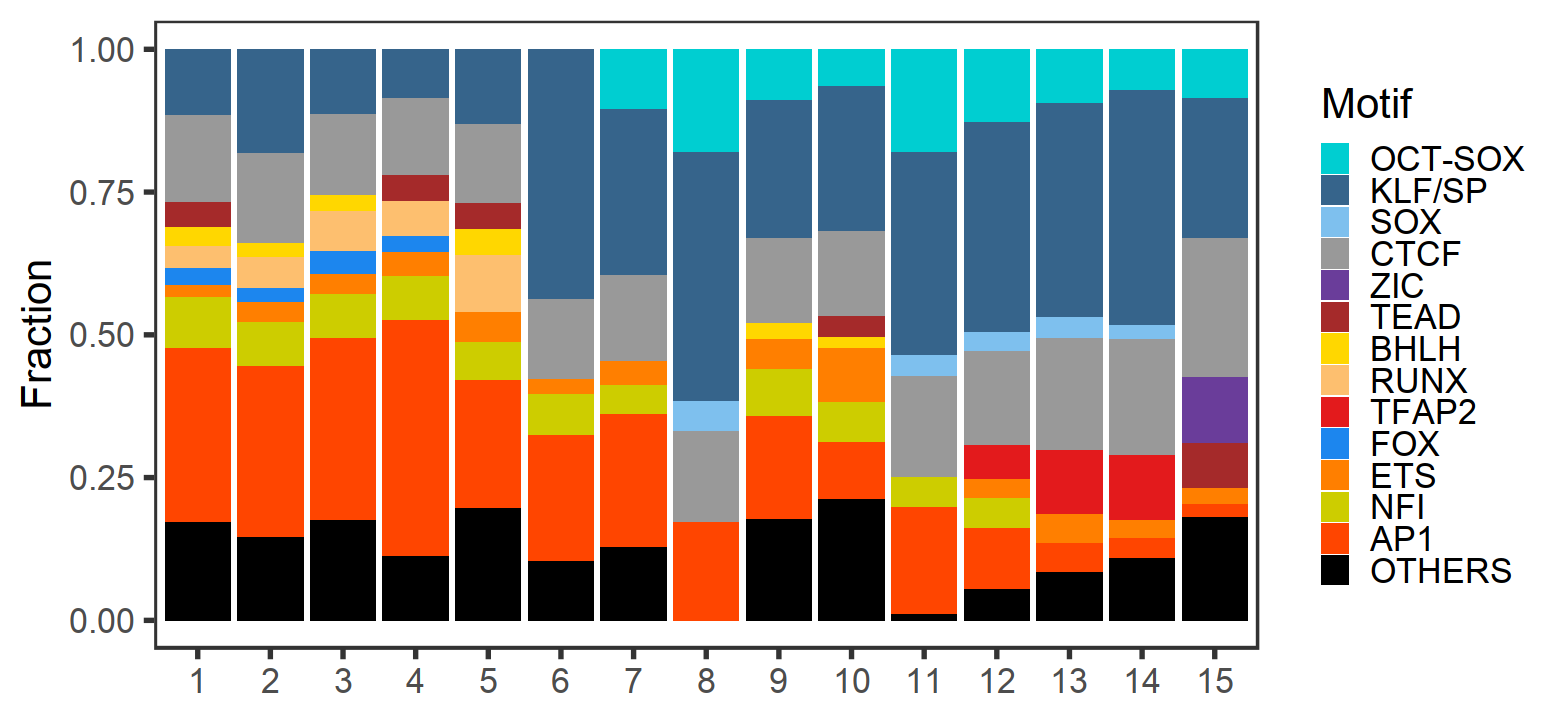

In [15]:
options(repr.plot.width = 13, repr.plot.height = 6)

p = ggplot(plot_df) +
geom_bar(aes(x=factor(idx), y=frac, fill=factor(motif, levels=MOTIFS)), stat="identity", position="stack") +
scale_fill_manual(values=cols, name="Motif") +
ylab("Fraction") +
theme_bw(base_size=25) +
theme(panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
     axis.title.x=element_blank())
# coord_flip()

p

In [17]:
x = plot_df[plot_df$motif == "CTCF", ]
x[order(x$idx), ]

motif,frac,idx
<chr>,<dbl>,<int>
CTCF,0.1534071,1
CTCF,0.1578764,2
CTCF,0.1412497,3
CTCF,0.1376355,4
CTCF,0.1400171,5
CTCF,0.1420842,6
CTCF,0.1514593,7
CTCF,0.1582989,8
CTCF,0.1492161,9


In [16]:
ggsave(p, file="./subfigs/20231004_re_modisco_hits_frac.pdf", width=13, height=6, useDingbats=F)

---

In [40]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_1.0.2   ggplot2_3.3.3

loaded via a namespace (and not attached):
 [1] magrittr_1.5      tidyselect_1.1.0  munsell_0.5.0     uuid_0.1-4       
 [5] colorspace_1.4-1  R6_2.4.1          rlang_0.4.11      tools_3.6.3      
 [9] grid_3.6.3        gtable_0.3.0      withr_2.1.2       htmltools_